Playground Series Season 3, Episode 5

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [13]:
data='train.csv'
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [15]:
df_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [17]:
df_test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


Data Cleaning

In [29]:
print('Categorical Variable:')
Categorical_Var=df_train.select_dtypes(include=['object']).columns
for cat_col in Categorical_Var:
    print(cat_col)

Categorical Variable:


In [27]:
print('Numerical Variable:')
Numerical_Var=df_train._get_numeric_data().columns
for cat_col in Numerical_Var:
    print(cat_col)

Numerical Variable:
Id
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [31]:
df_train.dtypes

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [35]:
for col in df_train.columns:
    print(col,df_train[col].isnull().sum())

Id 0
fixed acidity 0
volatile acidity 0
citric acid 0
residual sugar 0
chlorides 0
free sulfur dioxide 0
total sulfur dioxide 0
density 0
pH 0
sulphates 0
alcohol 0
quality 0


In [37]:
for col in df_test.columns:
    print(col,df_test[col].isnull().sum())

Id 0
fixed acidity 0
volatile acidity 0
citric acid 0
residual sugar 0
chlorides 0
free sulfur dioxide 0
total sulfur dioxide 0
density 0
pH 0
sulphates 0
alcohol 0


In [39]:
df_train.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


<AxesSubplot: title={'center': 'quality'}>

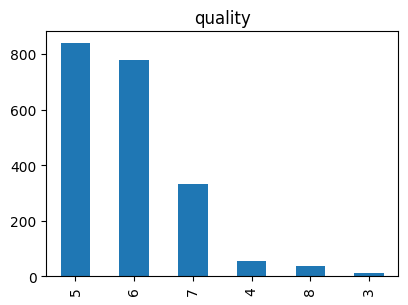

In [43]:
fig=plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df_train['quality'].value_counts().plot(kind='bar',title='quality')

Modelling

In [45]:
X=df_train.drop("quality",axis=1).values
y=df_train["quality"].values

In [48]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=24)
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((1644, 12), (1644,), (412, 12), (412,))

In [59]:
rf_model=RandomForestClassifier()
rf_model.fit(train_X,train_y)
rf_pred=rf_model.score(test_X,test_y)
rf_pred

0.5485436893203883

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y)

In [65]:
XGB_model=XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
XGB_model.fit(train_X,train_y)
XGB_pred=XGB_model.score(train_X,train_y)
XGB_pred


0.9233576642335767

In [66]:
models = pd.DataFrame({'Model': ['Random Forest','XGB'],'Score': [rf_pred,XGB_pred]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,XGB,0.923358
0,Random Forest,0.548544


In [67]:
combine_data=[df_train, df_test]
df_train.shape,df_test.shape

((2056, 13), (1372, 12))

In [68]:
train_X=df_train.drop("quality",axis=1)
train_y=df_train["quality"]
test_X=df_test.copy()

In [69]:
train_X.shape,train_y.shape,test_X.shape

((2056, 12), (2056,), (1372, 12))

In [72]:
sample_sub=pd.read_csv('sample_submission.csv')
sample_sub.head()

,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,5
4,2060,5


In [ ]:
Random_forest = ()
Random_forest.fit(train_X, train_y)
Y_pred = Random_forest.predict(test_X)

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y)

In [83]:
XGB_model=XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
XGB_model.fit(train_X, train_y)
Y_pred=XGB_model.predict(test_X)

In [84]:
Y_pred

array([2, 3, 2, ..., 2, 2, 3], dtype=int64)

In [88]:
id=df_test.Id
x=df_test
Y_pred=XGB_model.predict(x)

In [89]:
output=pd.DataFrame({'Id':id ,'quality': Y_pred})
output['quality']=output['quality']
output

,Id,quality
0,2056,2
1,2057,3
2,2058,2
3,2059,3
4,2060,2
...,...,...
1367,3423,2
1368,3424,4
1369,3425,2
1370,3426,2


In [78]:
output.to_csv('submisson.csv',index=False)